In [ ]:
# Importing necessary libraries for data analysis and visualization, and mounting Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Datasets/

[Errno 2] No such file or directory: 'drive/MyDrive/Datasets/'
/content/drive/MyDrive/Datasets


In [ ]:
# Reading a CSV file 'HouseListings.csv' with ISO-8859-1 encoding into a pandas DataFrame and displaying the first few rows

df = pd.read_csv('HouseListings.csv', encoding='ISO-8859-1')
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [ ]:
df = df.drop(columns=['Address','Latitude','Longitude'])

In [ ]:
df.duplicated().sum()

8499

In [ ]:
df.drop_duplicates(inplace=True)

# **Univariate Analysis**

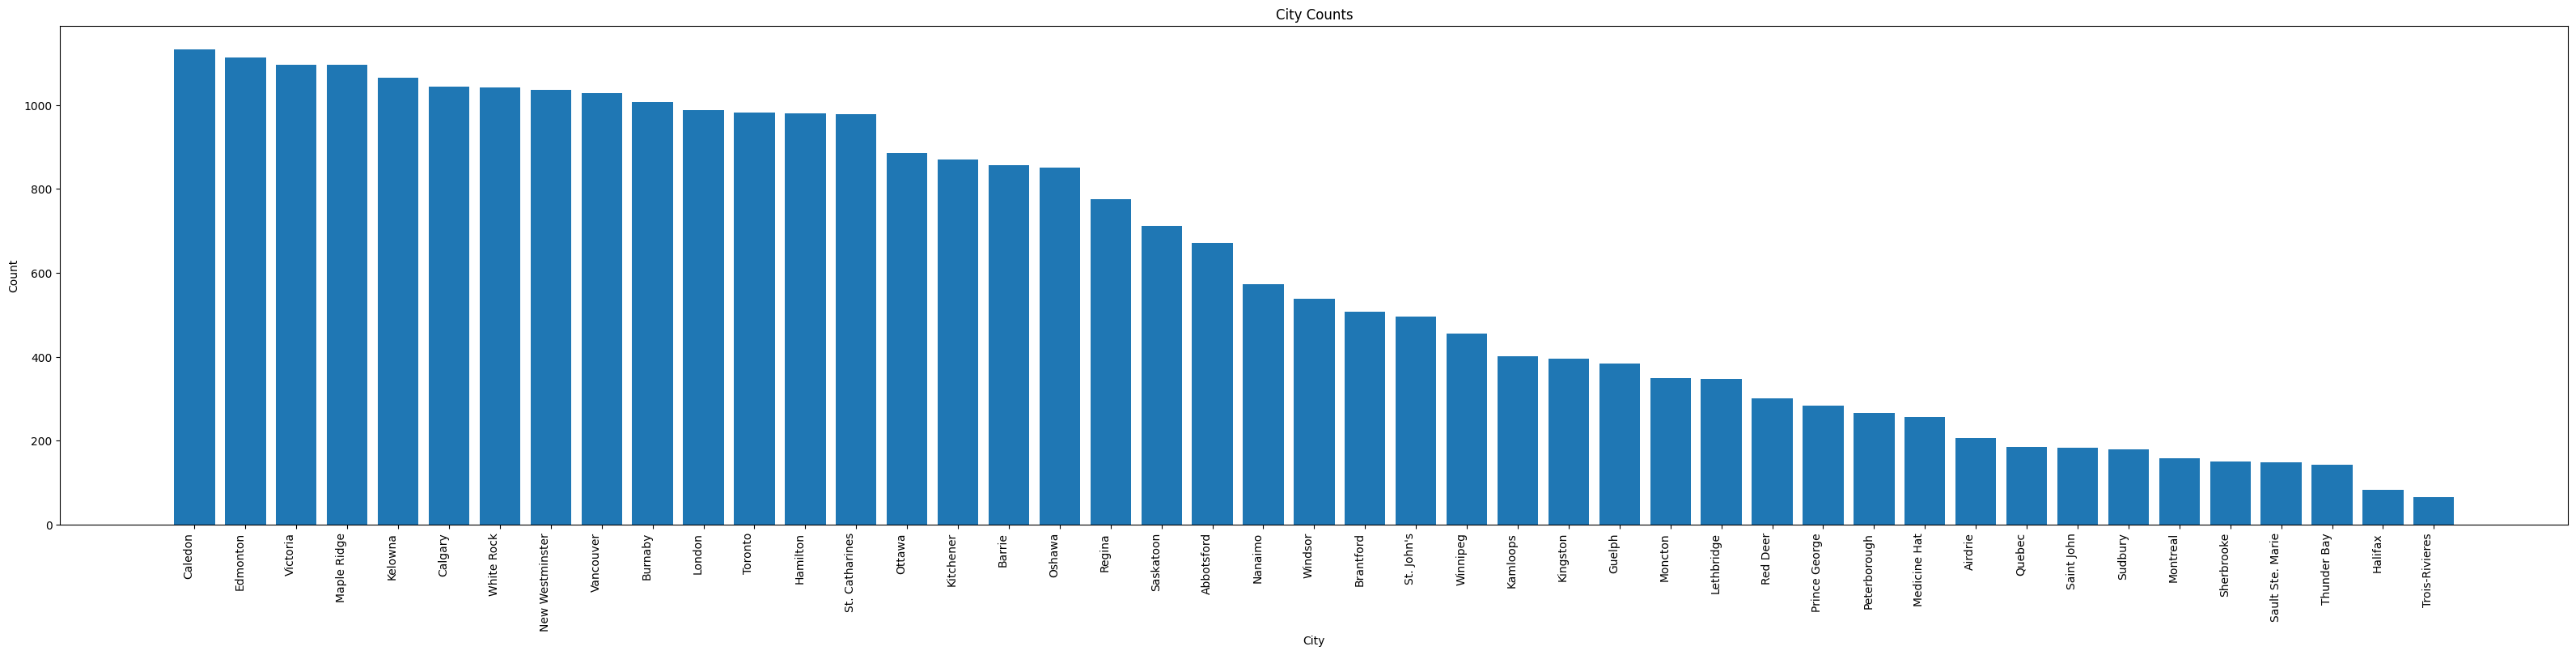

In [ ]:
# Counting the occurrences of each unique value in the 'City' column of the DataFrame
# Creating a bar plot to visualize the counts, with proper formatting for better readability

city_counts = df['City'].value_counts()
plt.figure(figsize=(40,8))
plt.xticks(rotation=90, ha='right')
plt.bar(city_counts.index, city_counts)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Counts')
plt.show()

In [ ]:
# Replaces long province names with their corresponding short forms in a DataFrame's 'Province' column

def short_province(df):
    long_name_list = ['Ontario','British Columbia', 'Alberta', 'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick', 'Quebec', 'Manitoba','Nova Scotia']
    short_name_list = ['ON', 'BC', 'AB', 'SK', 'NL', 'NB', 'QC', 'MB', 'NS']
    for i in range(len(long_name_list)):
        df.replace(to_replace = long_name_list[i],value = short_name_list[i],inplace = True)

short_province(df)

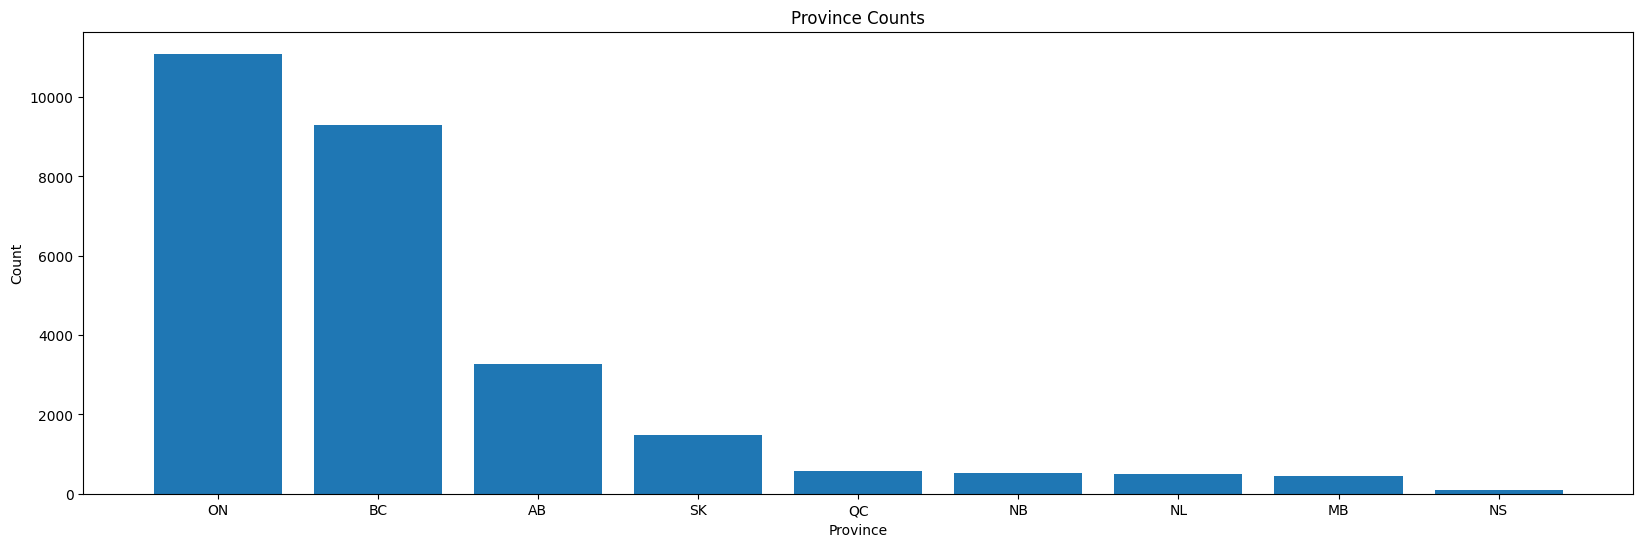

In [ ]:
# Counting the occurrences of each unique value in the 'Province' column of the DataFrame
# Creating a bar plot to visualize the counts, with proper formatting for better readability

province_counts = df['Province'].value_counts()
plt.figure(figsize=(20,6))
plt.bar(province_counts.index, province_counts)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Province Counts')
plt.show()

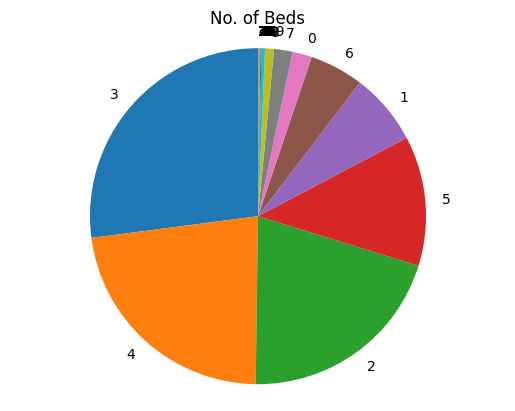

In [ ]:
# Counting the occurrences of each unique value in the 'Number_Beds' column of the DataFrame
# Creating a pie chart to visualize the distribution of number of beds, with proper formatting for better readability

bed_counts = df['Number_Beds'].value_counts()
plt.pie(bed_counts, labels=bed_counts.index, startangle=90)
plt.axis('equal')
plt.title('No. of Beds')
plt.show()

In [ ]:
Beds_more_than_100 = df[df['Number_Beds']>100].index
df.drop(Beds_more_than_100,inplace=True)

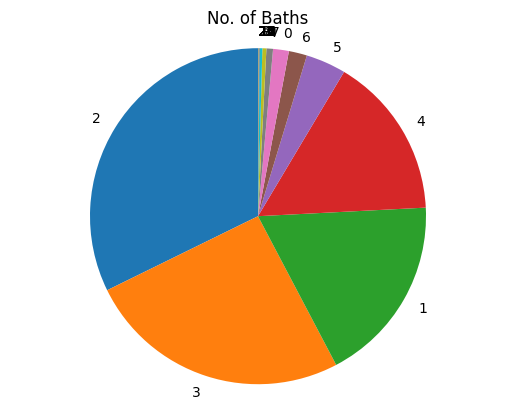

In [ ]:
# Counting the occurrences of each unique value in the 'Number_Baths' column of the DataFrame
# Creating a pie chart to visualize the distribution of number of baths, with proper formatting for better readability

baths_counts = df['Number_Baths'].value_counts()
plt.pie(baths_counts, labels=baths_counts.index, startangle=90)
plt.axis('equal')
plt.title('No. of Baths')
plt.show()

In [ ]:
zero_rooms_idx = df[(df['Number_Baths'] == 0) & (df['Number_Beds'] == 0)].index
df.drop(zero_rooms_idx, inplace=True)

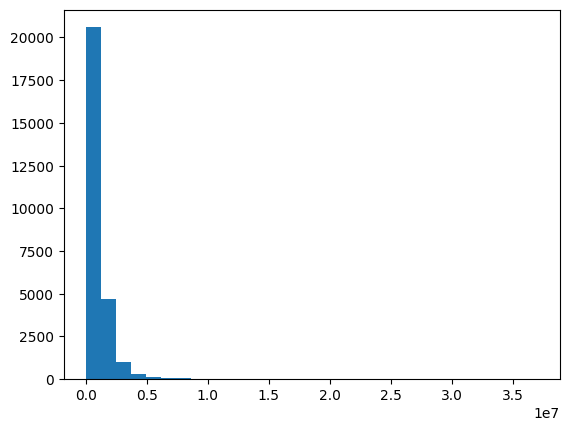

In [ ]:
plt.hist(df['Price'], bins=30)
plt.show()

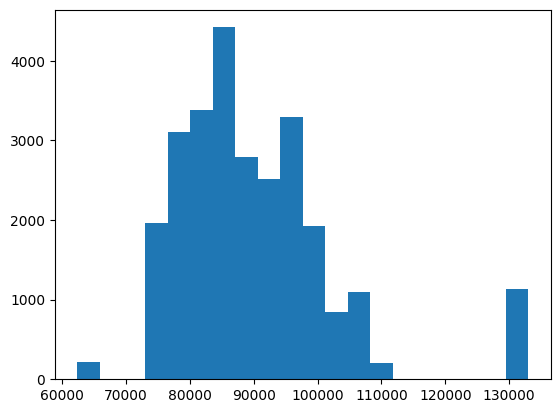

In [ ]:
plt.hist(df['Median_Family_Income'], bins=20)
plt.show()

# **Multivariate Analysis**

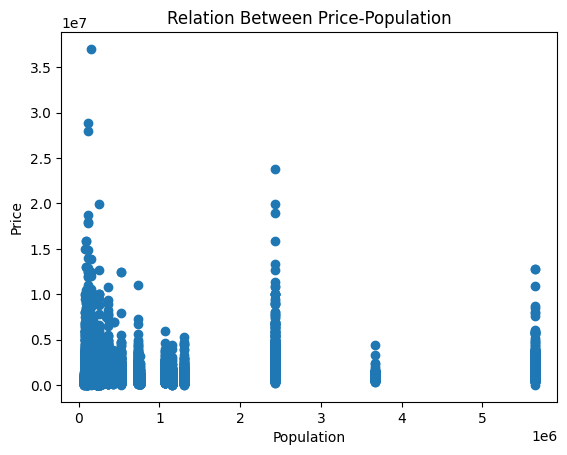

In [ ]:
# Creating a scatter plot to visualize the relationship between 'Price' and 'Population' columns in the DataFrame
# Each point on the plot represents a data point with 'Population' on the x-axis and 'Price' on the y-axis
# The plot helps to understand if there is any apparent relationship between the price of listings and the population of the area

Price_population = df[['Price','Population']]
plt.scatter(Price_population['Population'], Price_population['Price'])
plt.xlabel('Population')
plt.ylabel('Price')
plt.title('Relation Between Price-Population')
plt.show()

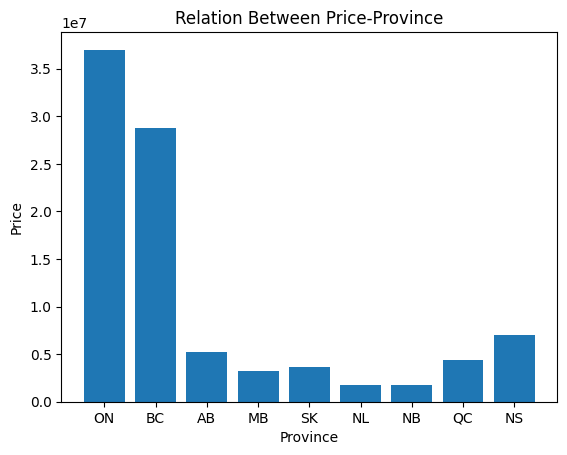

In [ ]:
# Creating a bar plot to visualize the relationship between 'Price' and 'Province' columns in the DataFrame
# Each bar represents the average price of listings in a particular province
# The plot helps to compare the average prices of listings across different provinces

Province_Price = df[['Price','Province']]
plt.bar(Province_Price['Province'], Province_Price['Price'])
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Relation Between Price-Province')
plt.show()

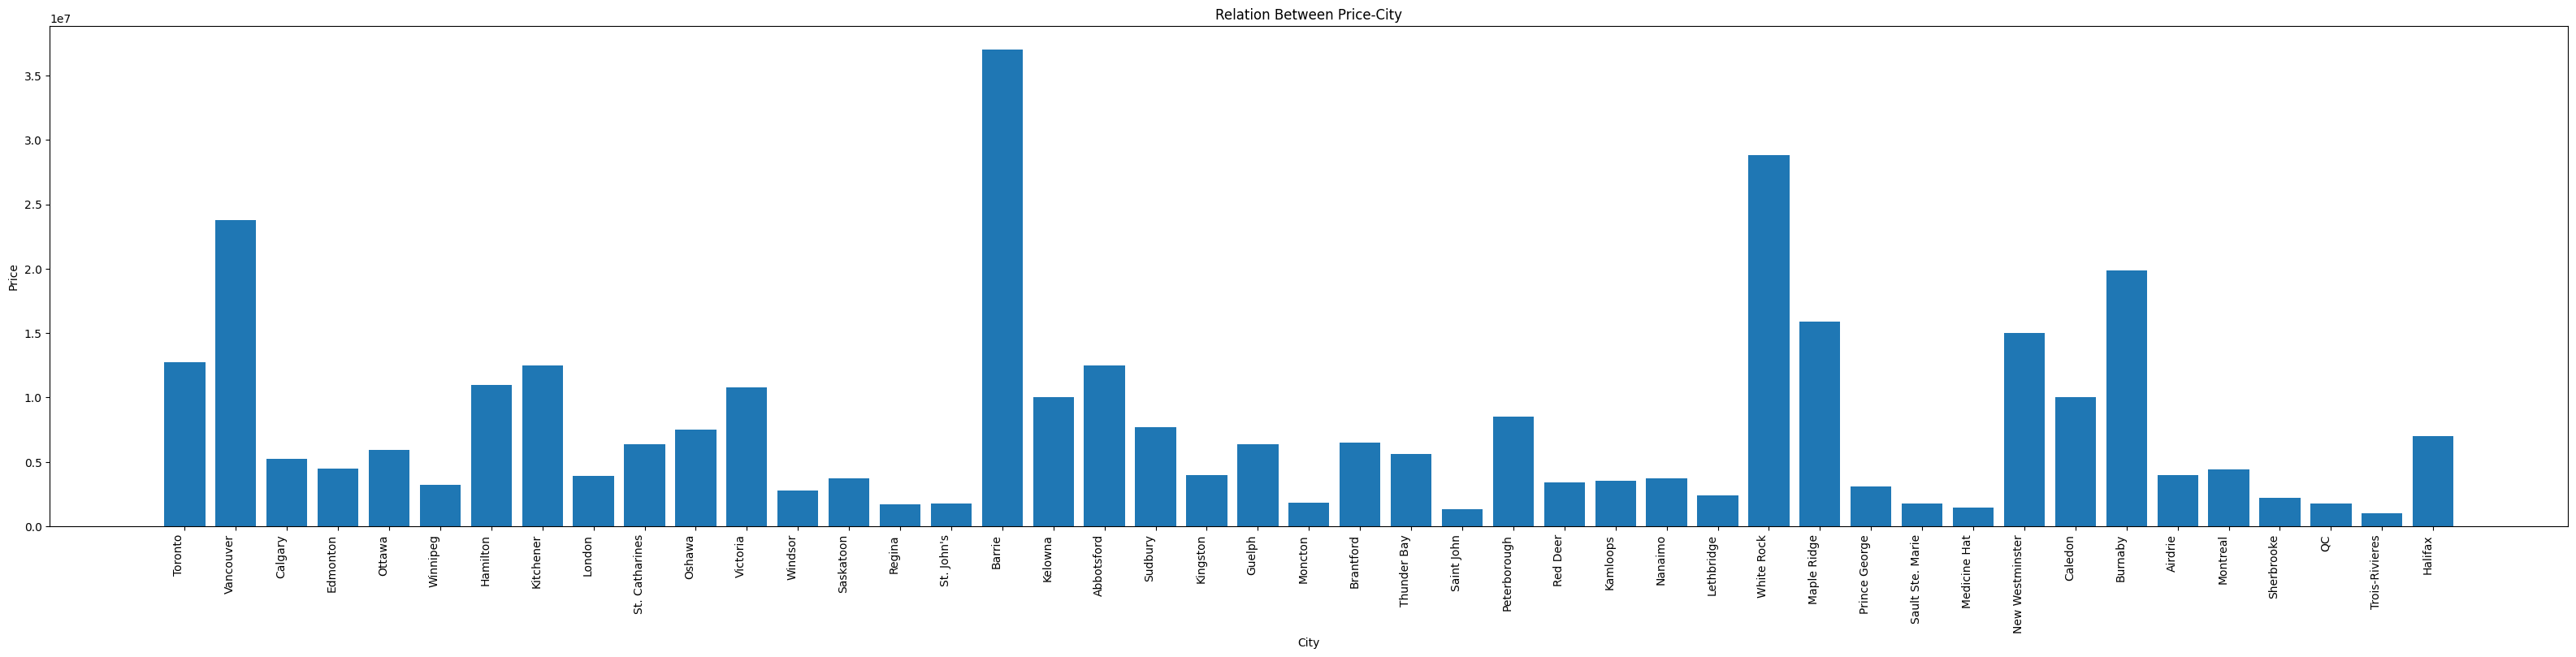

In [ ]:
# Creating a bar plot to visualize the relationship between 'Price' and 'City' columns in the DataFrame
# Each bar represents the average price of listings in a particular city
# The plot helps to compare the average prices of listings across different cities, with proper formatting for better readability

Price_City = df[['Price','City']]
plt.figure(figsize=(40,8))
plt.xticks(rotation=90, ha='right')
plt.bar(Price_City['City'], Price_City['Price'])
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Relation Between Price-City')
plt.show()

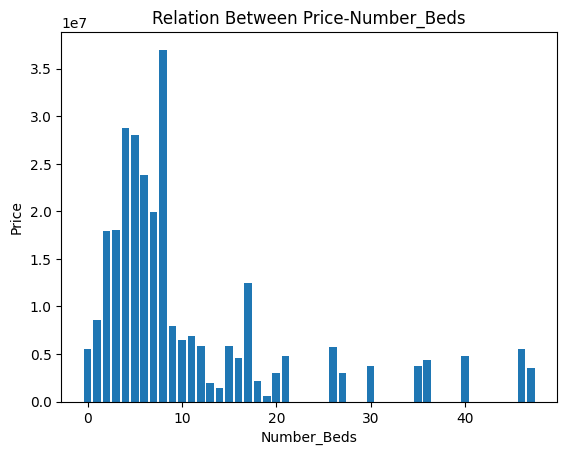

In [ ]:
# Creating a bar plot to visualize the relationship between 'Price' and 'Number_Beds' columns in the DataFrame
# Each bar represents the average price of listings with a specific number of bedrooms
# The plot helps to understand how the number of bedrooms relates to the average price of listings

Price_Beds = df[['Price','Number_Beds']]
plt.bar(Price_Beds['Number_Beds'], Price_Beds['Price'])
plt.xlabel('Number_Beds')
plt.ylabel('Price')
plt.title('Relation Between Price-Number_Beds')
plt.show()

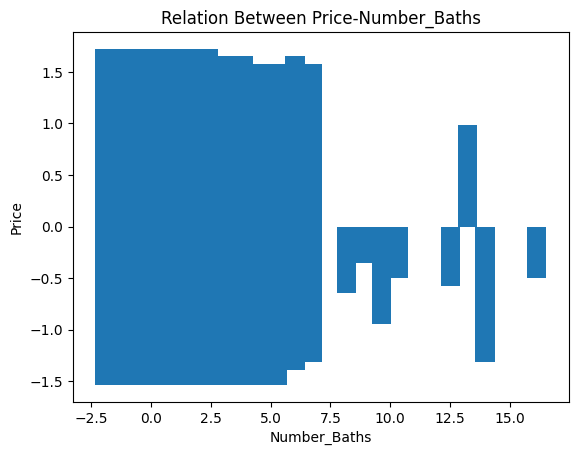

In [ ]:
# Creating a bar plot to visualize the relationship between 'Price' and 'Number_Baths' columns in the DataFrame
# Each bar represents the average price of listings with a specific number of bathrooms
# The plot helps to understand how the number of bathrooms relates to the average price of listings

Price_Beds = df[['Price','Number_Baths']]
plt.bar(Price_Beds['Number_Baths'], Price_Beds['Price'])
plt.xlabel('Number_Baths')
plt.ylabel('Price')
plt.title('Relation Between Price-Number_Baths')
plt.show()

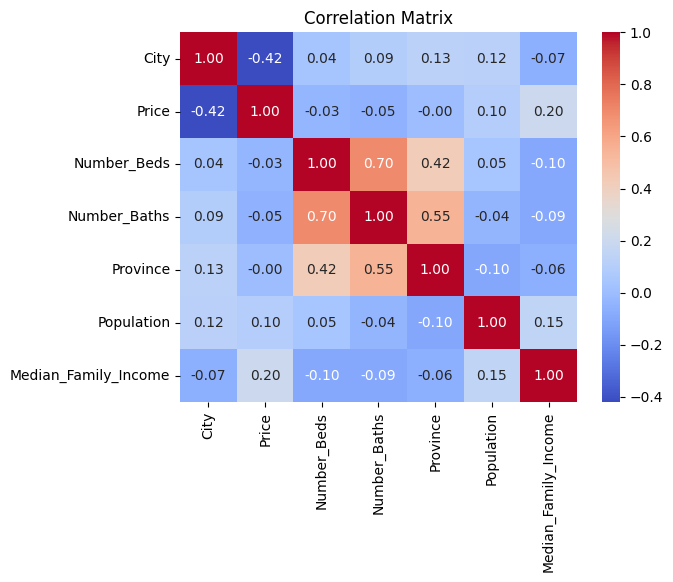

In [ ]:
# Creating a heatmap to visualize the correlation matrix of numerical columns in the DataFrame

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

le = LabelEncoder()
le_features = ['City','Province']
std = StandardScaler()
num_features = ['Population','Median_Family_Income','Number_Beds','Number_Baths']

# Encoding categorical features using LabelEncoder
for col in le_features:
  df[col] = le.fit_transform(df[col])

# Applying standard scaling to numerical features using ColumnTransformer
ct = ColumnTransformer(transformers=[('scaler', std, num_features)], remainder='passthrough')
df = ct.fit_transform(df)

# Converting the transformed data back to a DataFrame with proper column names
df = pd.DataFrame(df, columns=['City','Price','Number_Beds',	'Number_Baths',	'Province',	'Population',	'Median_Family_Income'])

# **Applying PCA**

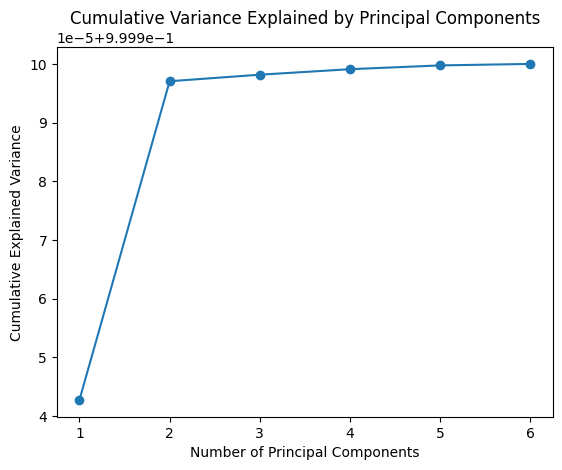

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principal_components = pca.fit_transform(df.drop("Price",axis=1))
variance_ratio = pca.explained_variance_ratio_
#Visualize the  cumulative variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# **Train-Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.drop('Price',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size = 0.2, random_state = 42)

print(f'X_train size: {X_train.shape} | y_train size: {y_train.shape} | X_test size: {X_test.shape} | y_test size: {y_test.shape}')

X_train size: (21527, 5) | y_train size: (21527,) | X_test size: (5382, 5) | y_test size: (5382,)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def Evaluate(pred1,pred2):
    # Printing Train-set Results
    print('\n\n{}Training Set Metrics{}'.format('-'*3, '-'*3))
    print('\nR2-Score on Training set --->',round(r2_score(y_train, pred1),3))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train-pred1)),3))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, pred1),3))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_train, pred1)),3))

    # Printing Test-set Results
    print('\n{}Testing Set Metrics{}'.format('-'*3, '-'*3))
    print('\nR2-Score on Testing set --->',round(r2_score(y_test, pred2),3))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_test-pred2)),3))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_test, pred2),3))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_test, pred2)),3))
    print('\n{}Residual Plots{}'.format('-'*3, '-'*3))

    # Plotting y_test & y_pred
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((y_train - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(y_train,pred1)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

# **Multiple Linear Regression**

The Coeffecient of the Regresion Model was found to be  [-5.82977509e-05 -2.32681298e-02 -5.86445585e-01  3.05774160e-01
  4.70339963e-01]
The Intercept of the Regresion Model was found to be  -0.0010706181036554913


---Training Set Metrics---

R2-Score on Training set ---> 0.796
Residual Sum of Squares (RSS) on Training set  ---> 4410.0
Mean Squared Error (MSE) on Training set       ---> 0.205
Root Mean Squared Error (RMSE) on Training set ---> 0.453

---Testing Set Metrics---

R2-Score on Testing set ---> 0.788
Residual Sum of Squares (RSS) on Training set  ---> 1123.882
Mean Squared Error (MSE) on Training set       ---> 0.209
Root Mean Squared Error (RMSE) on Training set ---> 0.457

---Residual Plots---


<ipython-input-56-0dbe77431604>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - pred1))


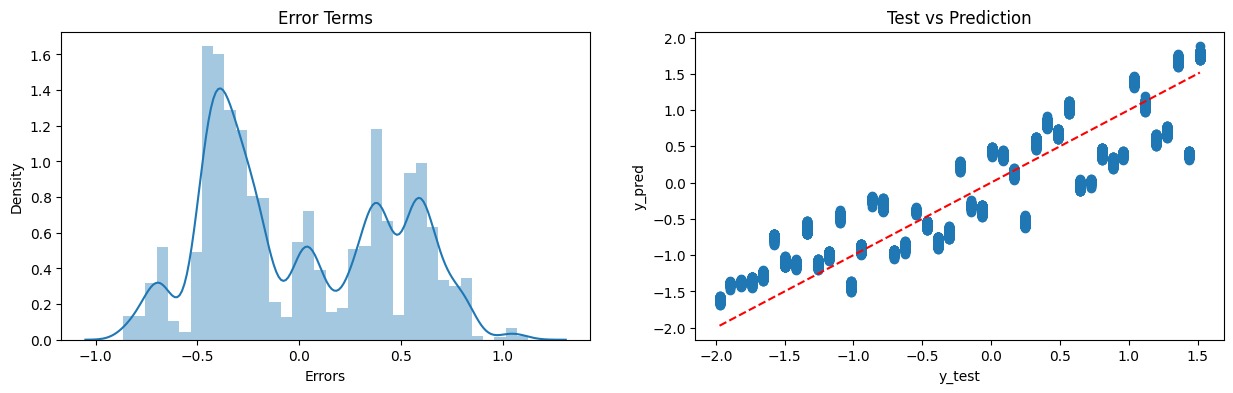

In [ ]:
from sklearn.linear_model import LinearRegression

MLR = LinearRegression().fit(X_train, y_train)
MLR_pred1 = MLR.predict(X_train)
MLR_pred2 = MLR.predict(X_test)

print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(MLR_pred1, MLR_pred2)

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import RidgeCV

RLR = RidgeCV(alphas=[0.001,0.01,0.1,1]).fit(X_train,y_train)
RLR_pred1 = RLR.predict(X_train)
RLR_pred2 = RLR.predict(X_test)

print('The Coeffecient of the Regresion Model was found to be ',RLR.coef_)
print('The Intercept of the Regresion Model was found to be ',RLR.intercept_)

Evaluate(RLR_pred1, RLR_pred2)

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoCV

LLR = LassoCV(alphas=[0.001,0.01,0.1]).fit(X_train,y_train)
LLR_pred1 = LLR.predict(X_train)
LLR_pred2 = LLR.predict(X_test)

print('The Coeffecient of the Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)

Evaluate(LLR_pred1, LLR_pred2)

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor().fit(X_train,y_train)

regr_pred1 = regr.predict(X_train)
regr_pred2 = regr.predict(X_test)

Evaluate(regr_pred1, regr_pred2)

# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor().fit(X_train, y_train)

DTR_pred1 = DTR.predict(X_train)
DTR_pred2 = DTR.predict(X_test)

Evaluate(DTR_pred1, DTR_pred2)